# 전이학습 
---
- cifar10

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [37]:
from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(x_train, y_train,
                                                    test_size = 0.3,
                                                    shuffle = 0.3)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(15000, 32, 32, 3)
(50000, 1)


In [39]:
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [40]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

# 모델

In [41]:
from tensorflow.keras.applications import VGG16

base = VGG16(weights = 'imagenet',
      input_shape = (32, 32, 3),
      include_top = False # 학습된 부분만 가져오겠단뜻 / 필터 레이어만 살아있고, unit 레이어 flatten, dense, output이 사라진다.
      )

base.trainable = False # base 모델을 더 이상 학습하지 못하게 fix시킴.
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [42]:
model = keras.Sequential([ # 여기 뒤에 flatten, dense, output을 넣어 기존 모델을 수정하여 개조가능하다.
    base,
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [43]:
model.summary() # base모델은 그대로 들어오고, 후반 dense layer와 출력부가 수정이 되었다.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
EPOCHS = 30
BATCH_SIZE = 64

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                verbose = 1)

Epoch 1/30
782/782 [==============================] - 24s 21ms/step - loss: 1.4465 - acc: 0.5010 - val_loss: 1.2567 - val_acc: 0.5661
Epoch 2/30
782/782 [==============================] - 15s 19ms/step - loss: 1.2325 - acc: 0.5720 - val_loss: 1.1843 - val_acc: 0.5883
Epoch 3/30
782/782 [==============================] - 15s 19ms/step - loss: 1.1820 - acc: 0.5901 - val_loss: 1.1490 - val_acc: 0.6008
Epoch 4/30
782/782 [==============================] - 15s 19ms/step - loss: 1.1544 - acc: 0.5980 - val_loss: 1.1305 - val_acc: 0.6074
Epoch 5/30
782/782 [==============================] - 15s 19ms/step - loss: 1.1325 - acc: 0.6069 - val_loss: 1.0984 - val_acc: 0.6177
Epoch 6/30
782/782 [==============================] - 15s 19ms/step - loss: 1.1133 - acc: 0.6114 - val_loss: 1.0909 - val_acc: 0.6209
Epoch 7/30
782/782 [==============================] - 15s 19ms/step - loss: 1.0986 - acc: 0.6161 - val_loss: 1.0639 - val_acc: 0.6303
Epoch 8/30
782/782 [==============================] - 15s 19ms

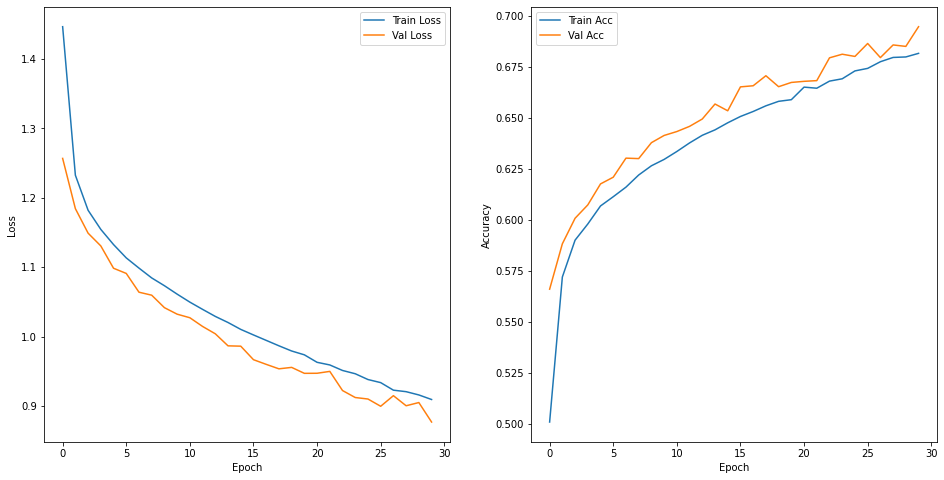

In [47]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [49]:
model.evaluate(x_test, y_test_oh)

469/469 [==============================] - 5s 9ms/step - loss: 0.8864 - acc: 0.6888


[0.8863815069198608, 0.6887999773025513]

In [50]:
y_pred = model.predict(x_test)

469/469 [==============================] - 4s 8ms/step


In [53]:
y_pred = np.argmax(y_pred, axis = 1)

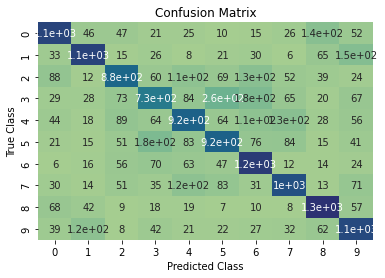

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False, cmap = 'crest')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)